In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [133]:
df_emission = pd.read_csv(r'../../results/df_emission.csv')
df_emission = df_emission.rename(columns={'Label': 'future'})
df_emission

,Year,Result,Scenario,Strategy,dist_BEB,dist_CDB,dist_HEB,future,YearlyResult,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB,CO2e_CDB,CO2e_HEB,CO2e,YearlyResult100000gals,YearlyResult-1000gallons
0,2022,2738.750000,lo-cap,Status quo,674.998976,10965.000000,899.999000,Status quo,707460.738888,2.832426e+06,232483.416719,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
1,2023,2738.750000,lo-cap,Status quo,674.998976,10965.000000,899.999000,Status quo,707460.738888,2.832426e+06,232483.416719,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
2,2024,2738.750000,lo-cap,Status quo,674.998976,10965.000000,899.999000,Status quo,707460.738888,2.832426e+06,232483.416719,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
3,2025,2738.750000,lo-cap,Status quo,674.998976,10965.000000,899.999000,Status quo,707460.738888,2.832426e+06,232483.416719,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
4,2026,2738.750000,lo-cap,Status quo,674.998976,10965.000000,899.999000,Status quo,707460.738888,2.832426e+06,232483.416719,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2031,1869.475807,lo-cap,Hybrid+Electric,3059.972316,6280.937131,3199.979539,lo-cap Hybrid+Electric,482914.006665,1.622461e+06,826603.336956,7.904373e+05,5244.619263,2203.842411,7448.461674,4.829140,482.914007
136,2032,1775.253148,lo-cap,Hybrid+Electric,3374.995608,5865.924205,3299.969174,lo-cap Hybrid+Electric,458574.862181,1.515257e+06,852432.178967,8.718126e+05,4898.081041,2272.705788,7170.786829,4.585749,458.574862
137,2033,1682.534231,lo-cap,Hybrid+Electric,3689.970751,5450.924580,3399.993655,lo-cap Hybrid+Electric,434624.157104,1.408057e+06,878270.022229,9.531755e+05,4551.553925,2341.593164,6893.147090,4.346242,434.624157
138,2034,1591.483218,lo-cap,Hybrid+Electric,4004.975469,5035.920542,3499.992975,lo-cap Hybrid+Electric,411104.296973,1.300855e+06,904101.366023,1.034546e+06,4205.023125,2410.463212,6615.486337,4.111043,411.104297


In [134]:
df_emission_aggregated = df_emission.groupby(['future', 'Scenario', 'Strategy'], as_index=False)[['YearlyResult', 'CO2e', 'Yearly_dist_CDB', 'Yearly_dist_HEB', 'Yearly_dist_BEB']].sum()
df_emission_aggregated

,future,Scenario,Strategy,YearlyResult,CO2e,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB
0,Status quo,lo-cap,Status quo,9.904450e+06,136859.423742,3.965397e+07,3.254768e+06,2.441075e+06
1,hi-cap Electric,hi-cap,Electric,6.709034e+06,99144.404524,2.798655e+07,3.254768e+06,1.411170e+07
2,hi-cap Hybrid,hi-cap,Hybrid,7.985359e+06,117929.206452,6.215778e+06,3.669596e+07,2.441075e+06
3,hi-cap Hybrid+Electric,hi-cap,Hybrid+Electric,5.494231e+06,87259.209457,6.838410e+06,2.443755e+07,1.407684e+07
4,lo-cap Electric,lo-cap,Electric,8.122233e+06,116879.814072,3.347313e+07,3.254768e+06,8.625055e+06
5,lo-cap Hybrid,lo-cap,Hybrid,8.482770e+06,123210.366500,1.554021e+07,2.737157e+07,2.441075e+06
6,lo-cap Hybrid+Electric,lo-cap,Hybrid+Electric,7.683014e+06,113599.510293,2.702546e+07,9.841747e+06,8.485593e+06
7,mid-cap Electric,mid-cap,Electric,7.300477e+06,107034.968123,3.042755e+07,3.254768e+06,1.167059e+07
8,mid-cap Hybrid,mid-cap,Hybrid,8.107497e+06,119211.741240,8.480250e+06,3.443149e+07,2.441075e+06
9,mid-cap Hybrid+Electric,mid-cap,Hybrid+Electric,6.144831e+06,96118.167281,1.104365e+07,2.266176e+07,1.164739e+07


In [135]:
status_quo_emissions = df_emission_aggregated['CO2e'].loc[df_emission_aggregated['future']=='Status quo'].item()

# Calculate avoided CO2e
df_emission_aggregated['avoided_CO2e'] = status_quo_emissions - df_emission_aggregated['CO2e']
df_emission_aggregated

,future,Scenario,Strategy,YearlyResult,CO2e,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB,avoided_CO2e
0,Status quo,lo-cap,Status quo,9.904450e+06,136859.423742,3.965397e+07,3.254768e+06,2.441075e+06,0.000000
1,hi-cap Electric,hi-cap,Electric,6.709034e+06,99144.404524,2.798655e+07,3.254768e+06,1.411170e+07,37715.019219
2,hi-cap Hybrid,hi-cap,Hybrid,7.985359e+06,117929.206452,6.215778e+06,3.669596e+07,2.441075e+06,18930.217290
3,hi-cap Hybrid+Electric,hi-cap,Hybrid+Electric,5.494231e+06,87259.209457,6.838410e+06,2.443755e+07,1.407684e+07,49600.214286
4,lo-cap Electric,lo-cap,Electric,8.122233e+06,116879.814072,3.347313e+07,3.254768e+06,8.625055e+06,19979.609671
5,lo-cap Hybrid,lo-cap,Hybrid,8.482770e+06,123210.366500,1.554021e+07,2.737157e+07,2.441075e+06,13649.057242
6,lo-cap Hybrid+Electric,lo-cap,Hybrid+Electric,7.683014e+06,113599.510293,2.702546e+07,9.841747e+06,8.485593e+06,23259.913449
7,mid-cap Electric,mid-cap,Electric,7.300477e+06,107034.968123,3.042755e+07,3.254768e+06,1.167059e+07,29824.455620
8,mid-cap Hybrid,mid-cap,Hybrid,8.107497e+06,119211.741240,8.480250e+06,3.443149e+07,2.441075e+06,17647.682503
9,mid-cap Hybrid+Electric,mid-cap,Hybrid+Electric,6.144831e+06,96118.167281,1.104365e+07,2.266176e+07,1.164739e+07,40741.256462


In [136]:
df_costs = pd.read_csv(r'../../results/df_all_costs.csv')
df_costs

,Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$),future,yearly_purchased_buses,CDB- Investment Cost (M$),total_cost,conventional,electric,hybrid,cumulative_cost,operating_cost,maintenance_cost
0,2022,15.0,9.0,0.0,0.0,0.0,0.0,hi-cap Electric,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.565464,0.391071
1,2023,23.0,9.0,8.0,0.0,10.4,0.0,hi-cap Electric,8.0,0.0,10.4,NaN,NaN,NaN,10.4,2.536448,0.400357
2,2024,23.0,9.0,0.0,0.0,0.0,0.0,hi-cap Electric,0.0,0.0,0.0,NaN,NaN,NaN,10.4,2.536448,0.400357
3,2025,27.0,9.0,4.0,0.0,5.2,0.0,hi-cap Electric,4.0,0.0,5.2,NaN,NaN,NaN,15.6,2.485591,0.414643
4,2026,38.0,9.0,11.0,0.0,14.3,0.0,hi-cap Electric,11.0,0.0,14.3,NaN,NaN,NaN,29.9,2.353070,0.452857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2031,NaN,NaN,NaN,NaN,2.6,0.0,Status quo,NaN,0.0,2.6,0.0,2.0,0.0,44.3,2.565464,0.391071
136,2032,NaN,NaN,NaN,NaN,0.0,0.0,Status quo,NaN,0.0,0.0,0.0,0.0,0.0,44.3,2.565464,0.391071
137,2033,NaN,NaN,NaN,NaN,0.0,0.0,Status quo,NaN,1.2,1.2,3.0,0.0,0.0,45.5,2.565464,0.391071
138,2034,NaN,NaN,NaN,NaN,0.0,0.0,Status quo,NaN,0.0,0.0,0.0,0.0,0.0,45.5,2.565464,0.391071


In [137]:
# Define the mapping dictionary
future_mapping = {
    'hi-cap Hybrid Electric': 'hi-cap Hybrid+Electric',
    'mid-cap Hybrid Electric': 'mid-cap Hybrid+Electric',
    'lo-cap Hybrid Electric': 'lo-cap Hybrid+Electric',
#    'Status quo': 'lo-cap Status quo'
}

# Assuming df_costs has already been loaded, apply the mapping to the 'future' column
df_costs['future'] = df_costs['future'].replace(future_mapping)

# Show the unique values in 'future' to confirm the mapping was successful
df_costs['future'].unique()

array(['hi-cap Electric', 'mid-cap Electric', 'lo-cap Electric',
       'hi-cap Hybrid', 'mid-cap Hybrid', 'lo-cap Hybrid',
       'hi-cap Hybrid+Electric', 'mid-cap Hybrid+Electric',
       'lo-cap Hybrid+Electric', 'Status quo'], dtype=object)

In [138]:
#df_costs_aggregated = df_costs.groupby(['future'], as_index=False)[['total_cost', 'operating_cost', 'maintenance_cost']].sum()
#df_costs_aggregated['Total_Expenditure'] = df_costs_aggregated['total_cost'] + df_costs_aggregated['operating_cost'] + df_costs_aggregated['maintenance_cost']
#df_costs_aggregated

In [139]:
# Apply 4% discount rate to costs
discount_rate = 0.04
years = list(range(2022, 2041))  # from 2022 to 2040

# Calculate discount factor for each year
discount_factors = {year: 1 / ((1 + discount_rate) ** (year - 2022)) for year in years}

# Merge year info if df_costs has a 'year' column
df_costs['discount_factor'] = df_costs['Year'].map(discount_factors)

# Apply discounting
df_costs['discounted_total_cost'] = df_costs['total_cost'] * df_costs['discount_factor']
df_costs['discounted_operating_cost'] = df_costs['operating_cost'] * df_costs['discount_factor']
df_costs['discounted_maintenance_cost'] = df_costs['maintenance_cost'] * df_costs['discount_factor']

# Aggregate discounted costs
df_costs_aggregated = df_costs.groupby(['future'], as_index=False)[['discounted_total_cost', 'discounted_operating_cost', 'discounted_maintenance_cost']].sum()
df_costs_aggregated['Total_Expenditure'] = df_costs_aggregated['discounted_total_cost'] + df_costs_aggregated['discounted_operating_cost'] + df_costs_aggregated['discounted_maintenance_cost']

# Merge with emissions data
df_cost_emission_aggregated = df_emission_aggregated.merge(
    df_costs_aggregated[['future', 'discounted_total_cost', 'discounted_operating_cost', 'discounted_maintenance_cost', 'Total_Expenditure']],
    on='future', how='left'
)

# Rename for compatibility
df_cost_emission_aggregated = df_cost_emission_aggregated.rename(columns={
    'discounted_total_cost': 'total_cost',
    'discounted_operating_cost': 'operating_cost',
    'discounted_maintenance_cost': 'maintenance_cost'
})

df_cost_emission_aggregated

,future,Scenario,Strategy,YearlyResult,CO2e,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB,avoided_CO2e,total_cost,operating_cost,maintenance_cost,Total_Expenditure
0,Status quo,lo-cap,Status quo,9.904450e+06,136859.423742,3.965397e+07,3.254768e+06,2.441075e+06,0.000000,43.806662,28.183285,4.296173,76.286120
1,hi-cap Electric,hi-cap,Electric,6.709034e+06,99144.404524,2.798655e+07,3.254768e+06,1.411170e+07,37715.019219,181.249783,22.733785,6.490261,210.473829
2,hi-cap Hybrid,hi-cap,Hybrid,7.985359e+06,117929.206452,6.215778e+06,3.669596e+07,2.441075e+06,18930.217290,90.882765,23.153575,3.687448,117.723788
3,hi-cap Hybrid+Electric,hi-cap,Hybrid+Electric,5.494231e+06,87259.209457,6.838410e+06,2.443755e+07,1.407684e+07,49600.214286,262.417585,19.109108,6.200154,287.726848
4,lo-cap Electric,lo-cap,Electric,8.122233e+06,116879.814072,3.347313e+07,3.254768e+06,8.625055e+06,19979.609671,80.190771,24.586567,5.414562,110.191900
5,lo-cap Hybrid,lo-cap,Hybrid,8.482770e+06,123210.366500,1.554021e+07,2.737157e+07,2.441075e+06,13649.057242,80.297868,24.684336,3.822689,108.804894
6,lo-cap Hybrid+Electric,lo-cap,Hybrid+Electric,7.683014e+06,113599.510293,2.702546e+07,9.841747e+06,8.485593e+06,23259.913449,99.497324,23.419722,5.297549,128.214595
7,mid-cap Electric,mid-cap,Electric,7.300477e+06,107034.968123,3.042755e+07,3.254768e+06,1.167059e+07,29824.455620,133.893055,23.769792,6.015538,163.678384
8,mid-cap Hybrid,mid-cap,Hybrid,8.107497e+06,119211.741240,8.480250e+06,3.443149e+07,2.441075e+06,17647.682503,88.146082,23.551786,3.723969,115.421837
9,mid-cap Hybrid+Electric,mid-cap,Hybrid+Electric,6.144831e+06,96118.167281,1.104365e+07,2.266176e+07,1.164739e+07,40741.256462,195.921704,19.962112,5.758122,221.641938


In [140]:
### First version of the plot only with cost for simulation years to 2040

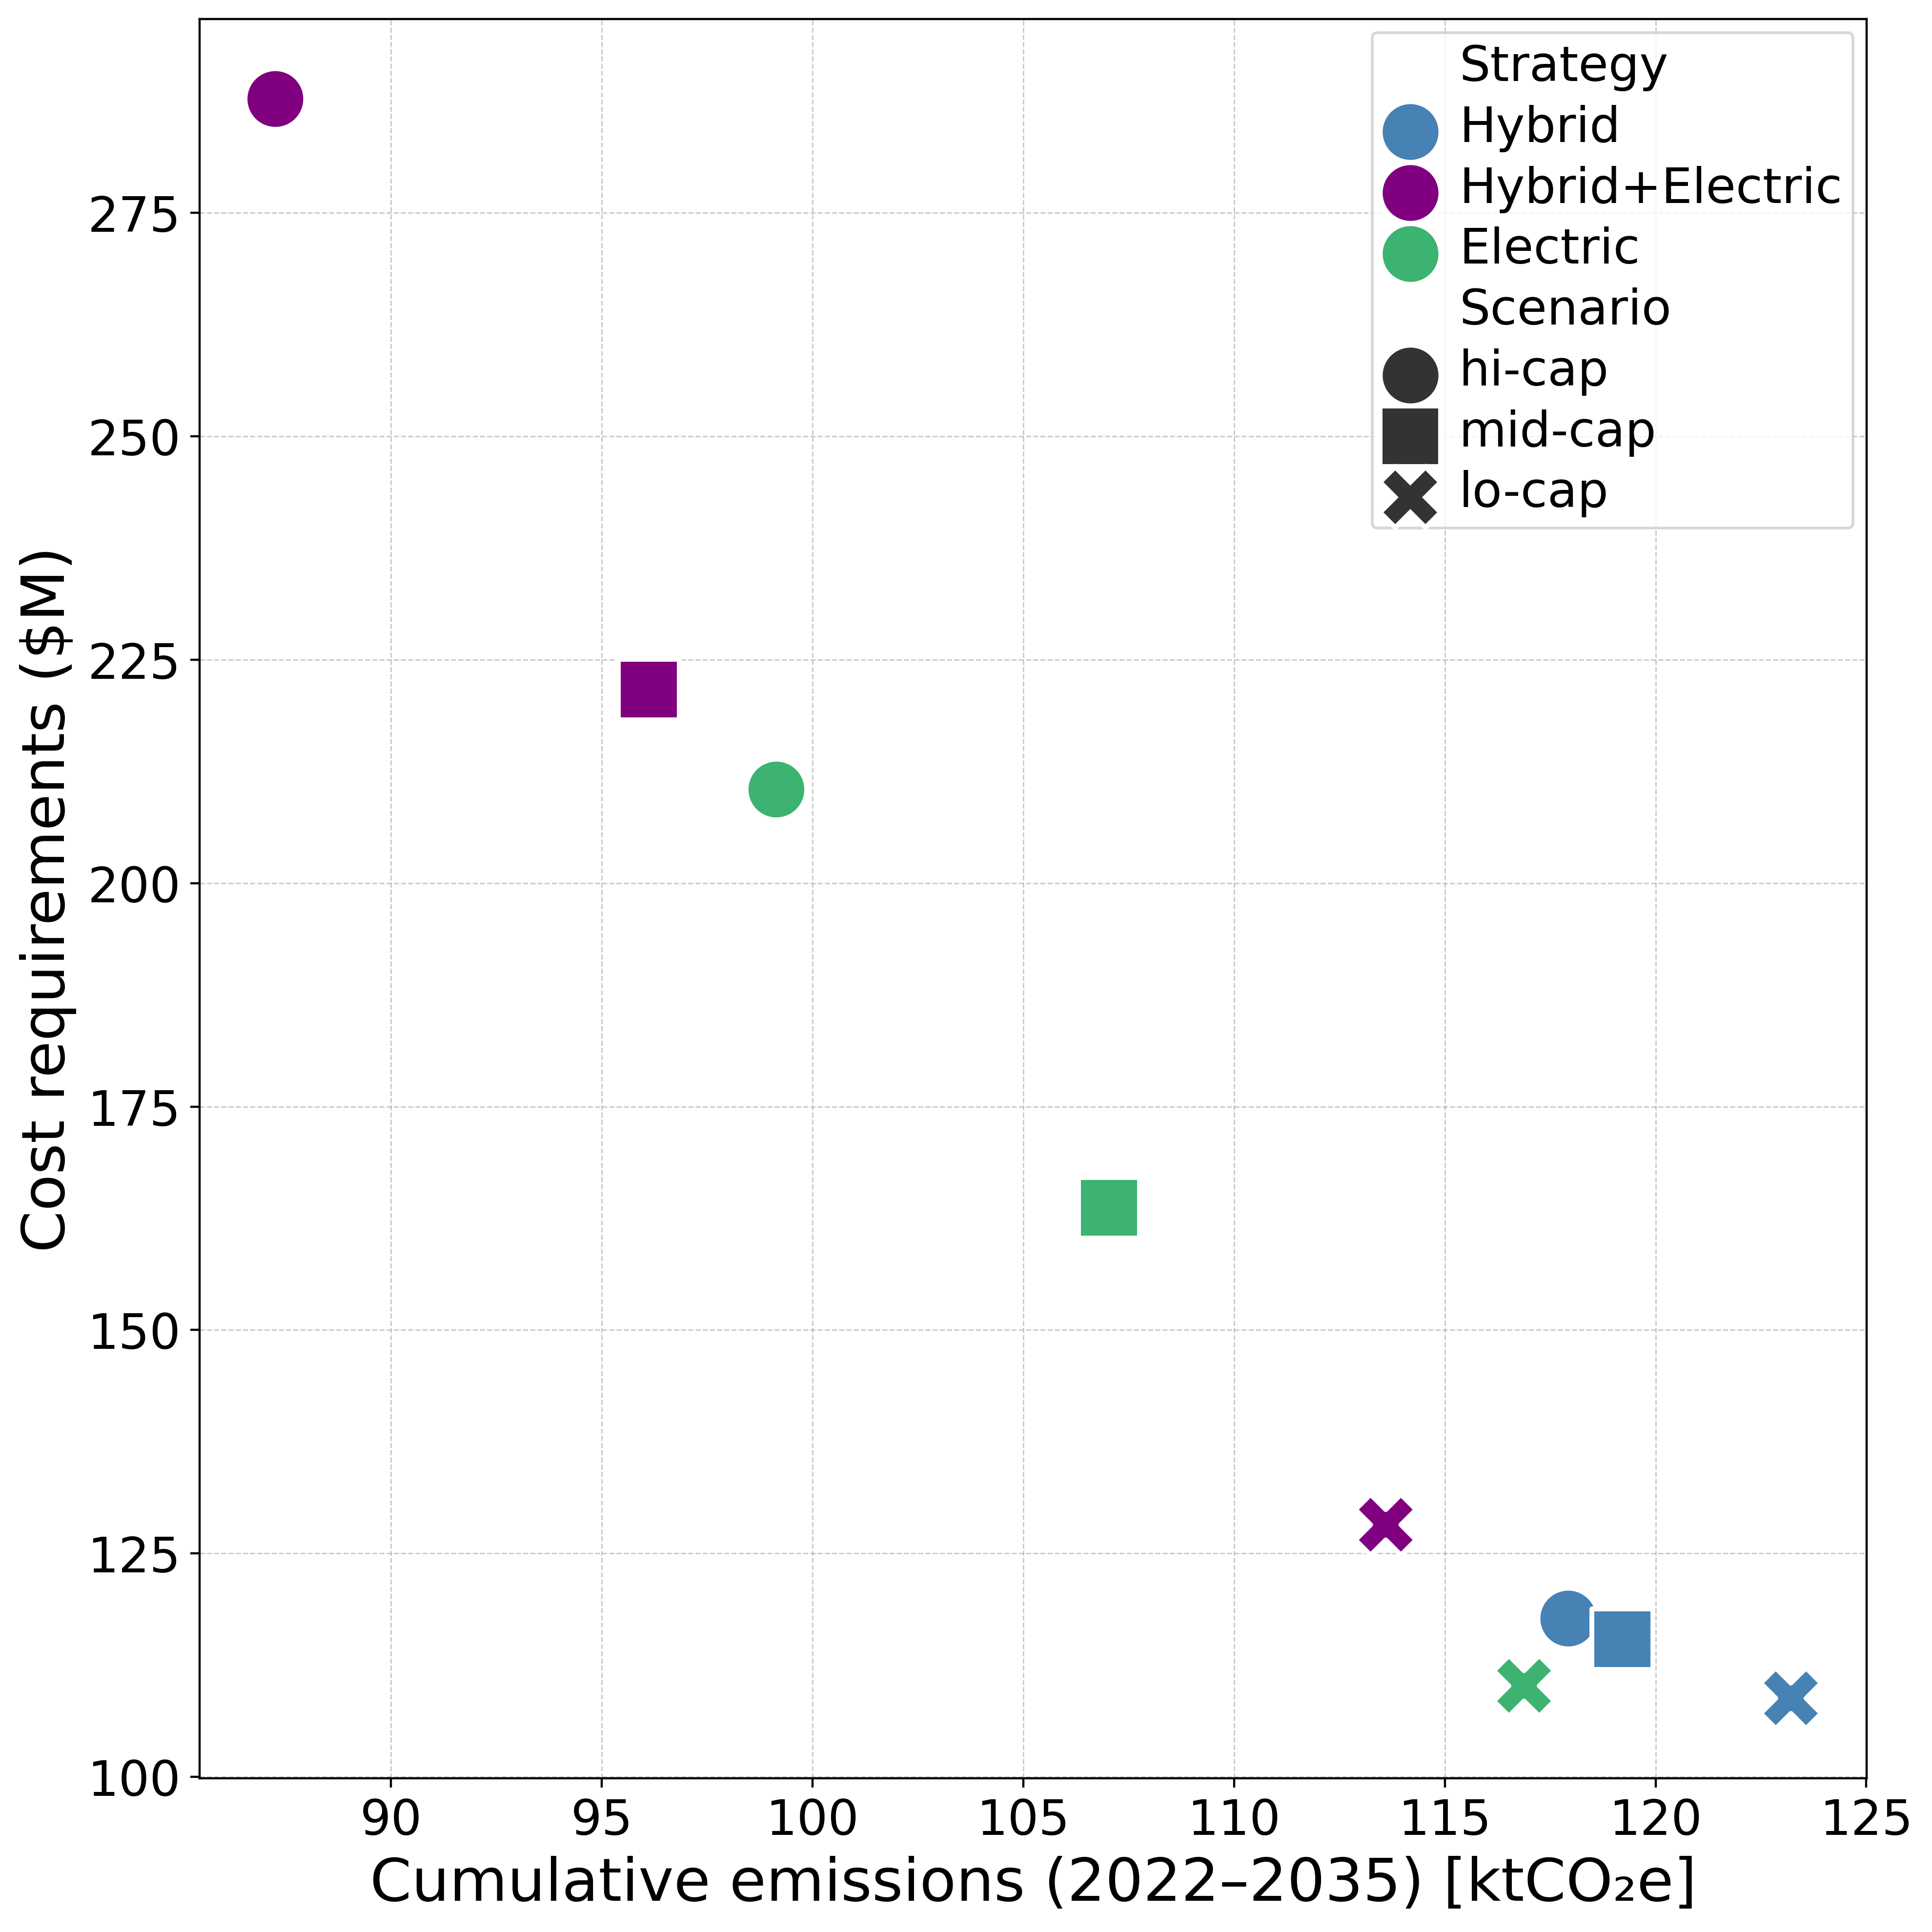

In [141]:
df = df_cost_emission_aggregated.copy()

# Unit conversion
df['CO2e_kt'] = df['CO2e'] / 1000
df['Total_Expenditure_M'] = df['Total_Expenditure']

# Filter out 'Status quo'
df_plot = df[df['future'] != 'Status quo'].copy()

# Color and marker definitions
colors = {
    'Hybrid': 'steelblue',
    'Hybrid+Electric': 'purple',
    'Electric': 'mediumseagreen'
}
markers = {
    'hi-cap': 'o',
    'lo-cap': 'X',
    'mid-cap': 's'
}

# Start plot
plt.figure(figsize=(10, 10), dpi=400)
plot = sns.scatterplot(
    data=df_plot,
    x='CO2e_kt',
    y='Total_Expenditure_M',
    hue='Strategy',
    hue_order=list(colors.keys()),
    palette=colors,
    style='Scenario',
    style_order=['hi-cap','mid-cap','lo-cap'],  # Scenario legend order
    markers=markers,
    zorder= 3,
    s=500
)

# Axis labels
plt.xlabel('Cumulative emissions (2022–2035) [ktCO₂e]', fontsize=22)
plt.ylabel('Cost requirements ($M)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Customize legend
legend = plot.legend_
legend.get_title().set_fontsize('20')
for text in legend.get_texts():
    text.set_fontsize(18)

    
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


#plt.xlim(0, 100)
#plt.ylim(0, 550)


plt.tight_layout()
plt.savefig(r'../../figures/scatterplot_emissions_vs_investment_2035.png', bbox_inches='tight', dpi=400)
plt.show()


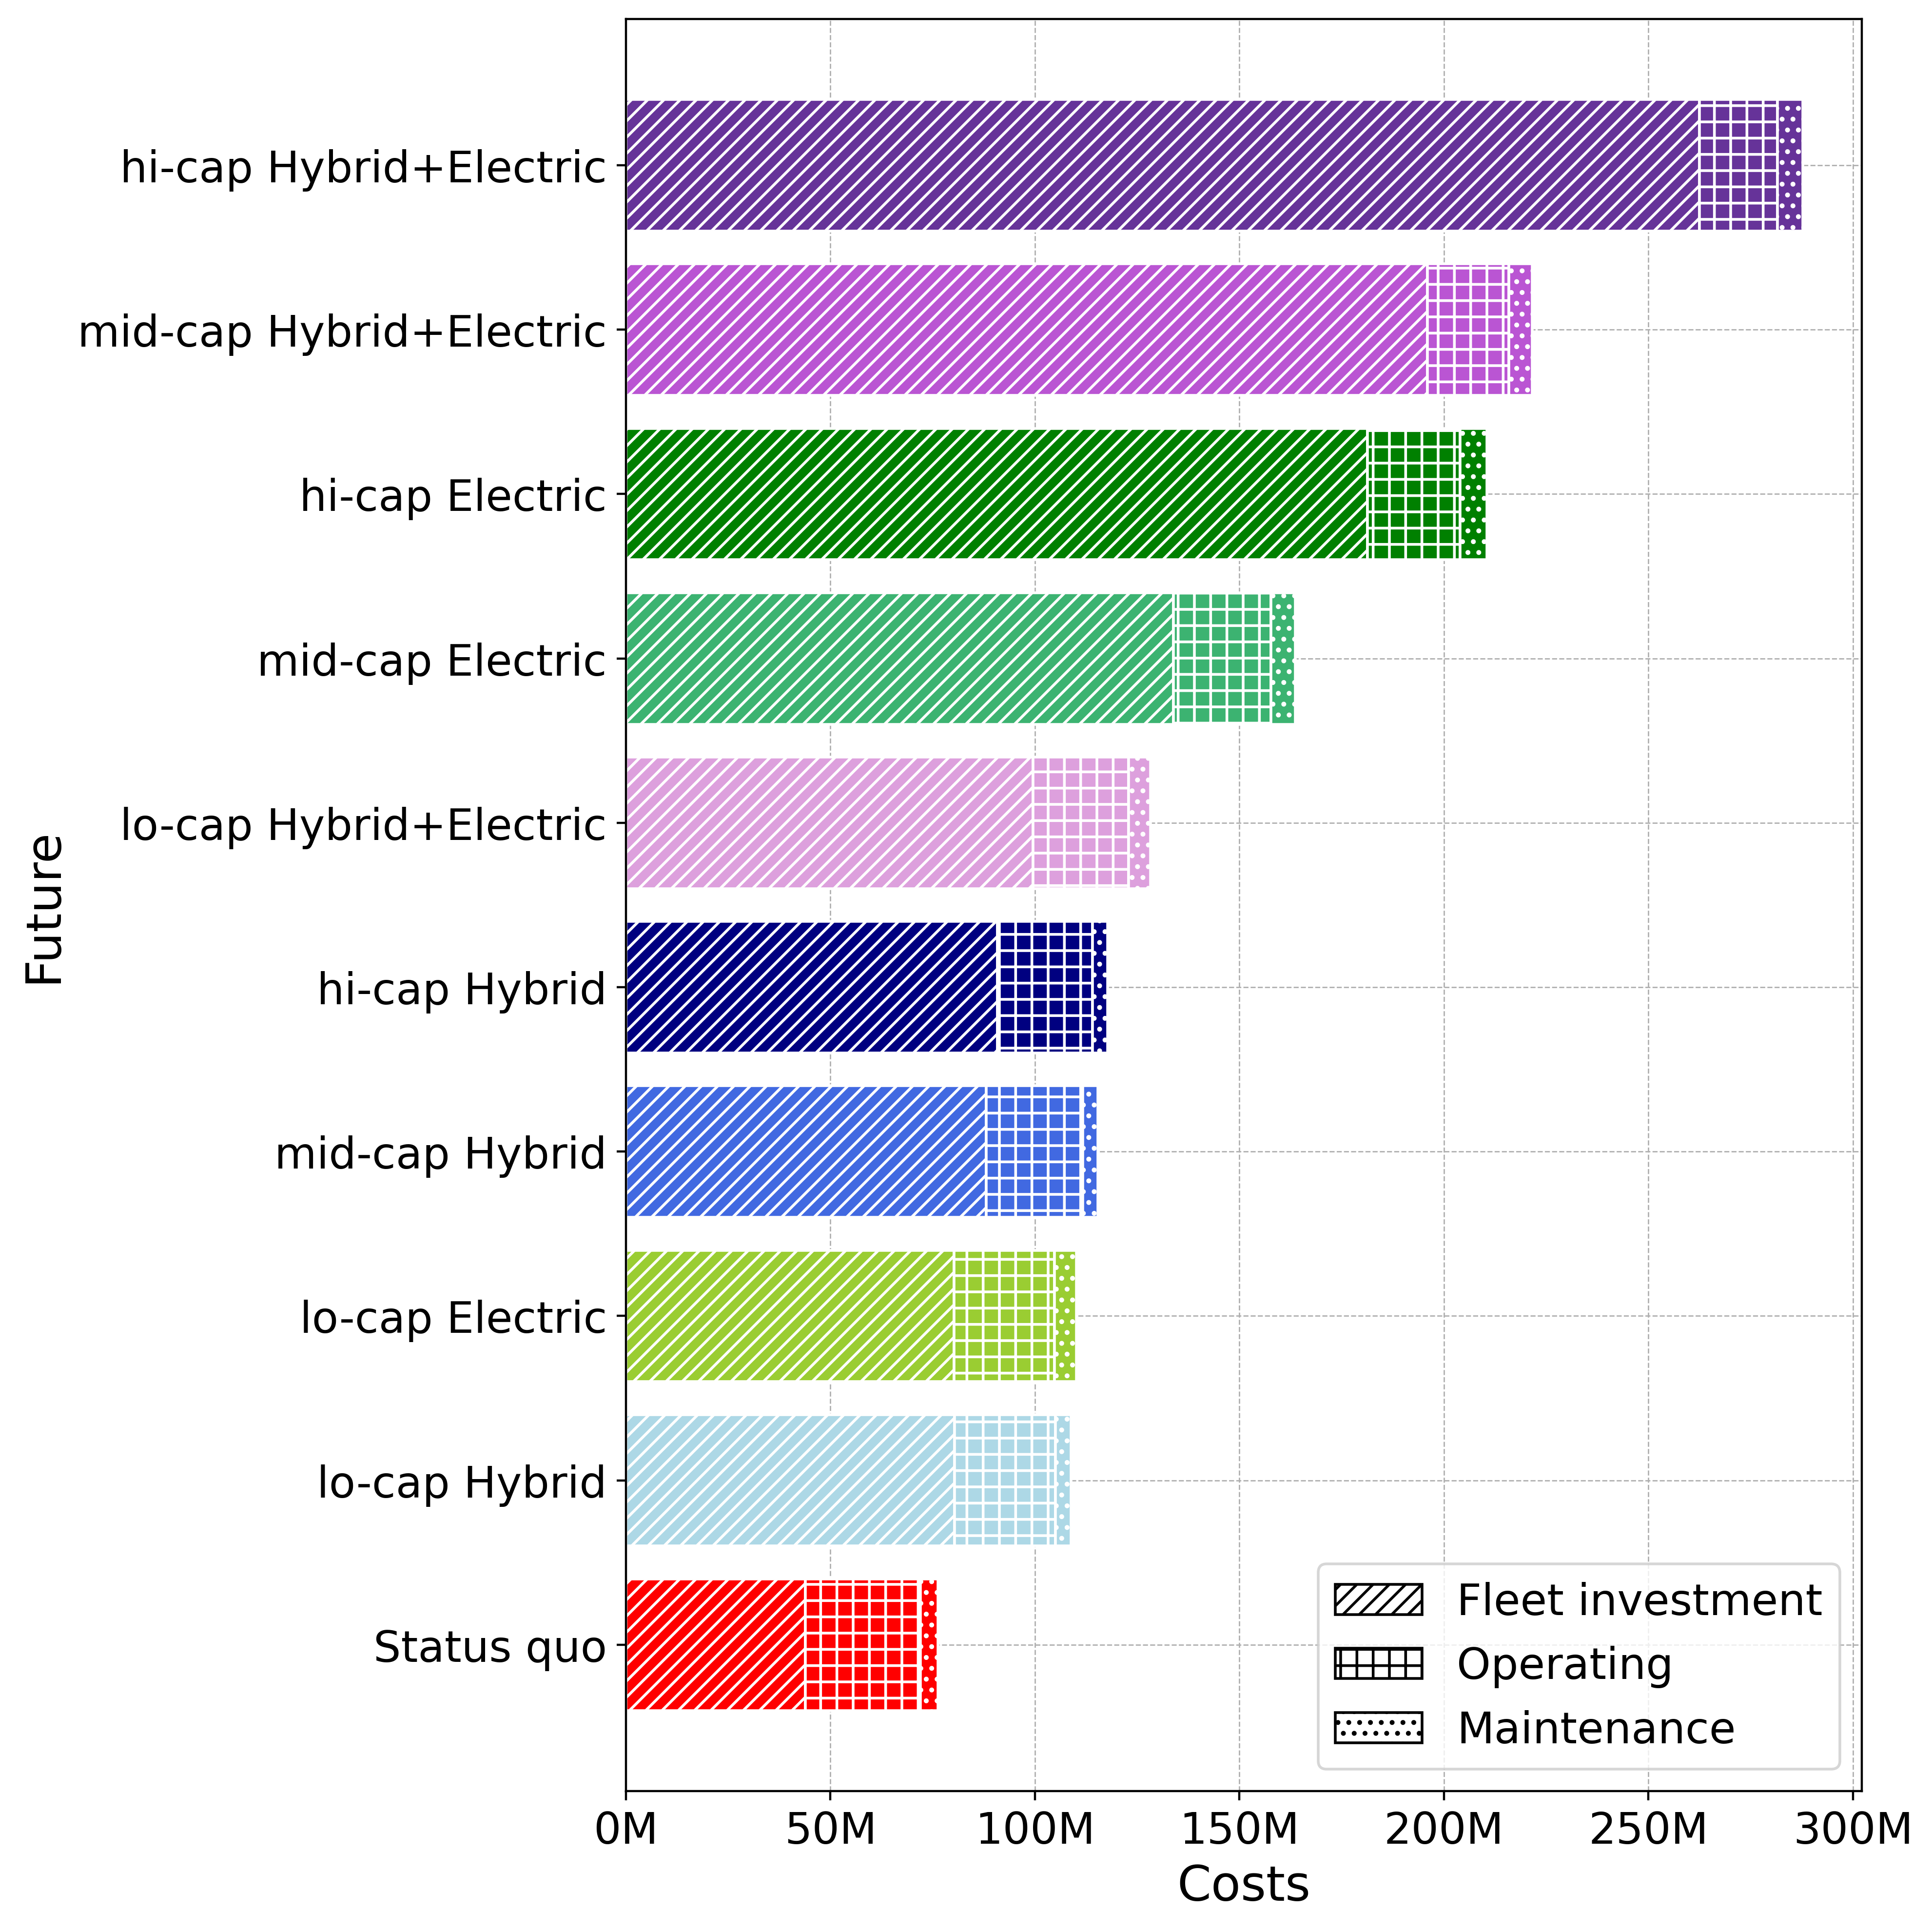

In [147]:
from matplotlib.patches import Patch


grouped_df = df_cost_emission_aggregated.copy()


# Sort the grouped_df by total cost (operating + maintenance + fleet investment) in descending order
#grouped_df['Total_Expenditure'] = grouped_df['operating_cost'] + grouped_df['maintenance_cost'] + grouped_df['total_cost']
grouped_df = grouped_df.sort_values(by='Total_Expenditure', ascending=True).reset_index(drop=True)


custom_palette = {
    "Status quo": "red",
    "lo-cap Hybrid": "lightblue",
    "mid-cap Hybrid": "royalblue",
    "hi-cap Hybrid": "navy",
    #"hi-cap Hybrid": "mediumblue",
    "lo-cap Hybrid+Electric": "plum",
    "mid-cap Hybrid+Electric": "mediumorchid",
    "hi-cap Hybrid+Electric": "rebeccapurple",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}


# Set the positions and width for the bars (after sorting)
positions = np.arange(len(grouped_df))
bar_height = 0.8  # Increased the thickness of the bars

# Create the plot
plt.figure(figsize=(10, 10), dpi=400)

# Plot the fleet investment costs with more discernible hatches (horizontal bars)
plt.barh(positions, grouped_df['total_cost'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Fleet investment Cost', height=bar_height, hatch='////', edgecolor='white')

# Plot the operating costs with more discernible hatches (stacked on top of fleet investment)
plt.barh(positions, grouped_df['operating_cost'], 
         left=grouped_df['total_cost'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Operating Cost', height=bar_height, hatch='++', edgecolor='white')

# Plot the maintenance costs with more discernible hatches (stacked on top of fleet investment and operating)
plt.barh(positions, grouped_df['maintenance_cost'], 
         left=grouped_df['total_cost'] + grouped_df['operating_cost'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Maintenance Cost', height=bar_height, hatch='...', edgecolor='white')

# Add titles and labels
plt.ylabel('Future', fontsize=18)  # Increased font size of y-axis labels
plt.xlabel('Costs', fontsize=18)   # Removed "(Million USD)" from the x-axis label

# Update plt.yticks to improve label alignment for the categories
plt.yticks(positions, grouped_df['future'], fontsize=16)  # Increased font size of y-axis labels
plt.xticks(fontsize=16)

# Format x-axis to show values in million USD with the M symbol
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}M'))

# Move grid lines to the background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Adjust the legend to show only hatches, not colors in the legend
legend_elements = [Patch(facecolor='white', edgecolor='black', hatch='////', label='Fleet investment'),
                   Patch(facecolor='white', edgecolor='black', hatch='++', label='Operating'),
                   Patch(facecolor='white', edgecolor='black', hatch='...', label='Maintenance')]

plt.legend(handles=legend_elements, title='', fontsize=16, title_fontsize=26, loc='lower right')

# Save and display the plot
plt.tight_layout()
plt.savefig(r'../../figures/allcosts-v02.png', dpi=400)
plt.show()


In [126]:
### First version of the plot with cost and co-benefit (health) for simulation years to 2040

In [127]:
#df_cost_emission_aggregated['avoided_Yearly_dist_CDB'] = df_cost_emission_aggregated['Yearly_dist_CDB'].loc[df_cost_emission_aggregated['future']=='Status quo'].item()
#df_cost_emission_aggregated['avoided_Yearly_dist_HEB'] = df_cost_emission_aggregated['Yearly_dist_HEB'].loc[df_cost_emission_aggregated['future']=='Status quo'].item()

#mpg_CDB = 3.17
#mpg_HEB = 3.85

#df_cost_emission_aggregated['benefit']= (df_cost_emission_aggregated['avoided_Yearly_dist_CDB']+df_cost_emission_aggregated['avoided_Yearly_dist_HEB']*(mpg_HEB / mpg_CDB))*0.202/1000000*410000 + (df_cost_emission_aggregated['avoided_Yearly_dist_CDB']+df_cost_emission_aggregated['avoided_Yearly_dist_HEB']*(mpg_HEB / mpg_CDB))*8.613/1000000*6100

# Convert benefit to Million
#df_cost_emission_aggregated['benefit']=df_cost_emission_aggregated['benefit']/1000000

#df_cost_emission_aggregated['cost-benefit'] = df_cost_emission_aggregated['Total_Expenditure'] - df_cost_emission_aggregated['benefit']

#df_cost_emission_aggregated

In [128]:
# Split Status Quo separately
df_status_quo = df_emission[df_emission['future'] == 'Status quo'][['Year', 'Scenario', 'Strategy', 'Yearly_dist_CDB', 'Yearly_dist_HEB']].copy()

df_status_quo = df_status_quo.rename(columns={
    'Yearly_dist_CDB': 'Yearly_dist_CDB_statusquo',
    'Yearly_dist_HEB': 'Yearly_dist_HEB_statusquo'
})

# Filter out Status quo from main df
df_emission = df_emission[df_emission['future'] != 'Status quo'].copy()

# Merge the correct status quo yearly distances back into df_emission based on year
df_emission = df_emission.merge(df_status_quo, on='Year', how='left')

# Now you can calculate avoided distances correctly year-by-year
df_emission['avoided_Yearly_dist_CDB'] = df_emission['Yearly_dist_CDB_statusquo'] - df_emission['Yearly_dist_CDB']
df_emission['avoided_Yearly_dist_HEB'] = df_emission['Yearly_dist_HEB_statusquo'] - df_emission['Yearly_dist_HEB']

# Ensure no negative avoided distances
df_emission['avoided_Yearly_dist_CDB'] = df_emission['avoided_Yearly_dist_CDB'].clip(lower=0)
df_emission['avoided_Yearly_dist_HEB'] = df_emission['avoided_Yearly_dist_HEB'].clip(lower=0)


# Continue with your previous benefit calculation:
mpg_CDB = 3.17
mpg_HEB = 3.85

df_emission['yearly_benefit'] = (
    (df_emission['avoided_Yearly_dist_CDB'] + df_emission['avoided_Yearly_dist_HEB'] * (mpg_HEB / mpg_CDB))
    * 0.202 / 1_000_000 * 410_000
    +
    (df_emission['avoided_Yearly_dist_CDB'] + df_emission['avoided_Yearly_dist_HEB'] * (mpg_HEB / mpg_CDB))
    * 8.613 / 1_000_000 * 6100
) / 1_000_000  # dollars to million dollars

# Discount factor per year
discount_rate = 0.04
df_emission['discount_factor'] = 1 / ((1 + discount_rate) ** (df_emission['Year'] - 2022))

# Discounted benefit
df_emission['discounted_benefit'] = df_emission['yearly_benefit'] * df_emission['discount_factor']

# Group by future
df_benefit_discounted = df_emission.groupby('future', as_index=False)['discounted_benefit'].sum()

# Rename for merging
df_benefit_discounted = df_benefit_discounted.rename(columns={'discounted_benefit': 'benefit'})


# Group the discounted benefits by 'future' and sum across all years
df_benefit_total = df_emission.groupby('future', as_index=False)['discounted_benefit'].sum()
df_benefit_total = df_benefit_total.rename(columns={'discounted_benefit': 'benefit'})


# Merge the total discounted benefit into your df_cost_emission_aggregated
df_cost_emission_aggregated = df_cost_emission_aggregated.merge(df_benefit_total, on='future', how='left')

# New column: Total expenditure minus benefit
df_cost_emission_aggregated['cost-benefit'] = df_cost_emission_aggregated['Total_Expenditure'] - df_cost_emission_aggregated['benefit']

df_cost_emission_aggregated

,future,Scenario,Strategy,YearlyResult,CO2e,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB,avoided_CO2e,total_cost,operating_cost,maintenance_cost,Total_Expenditure,benefit,cost-benefit
0,Status quo,lo-cap,Status quo,9.904450e+06,136859.423742,3.965397e+07,3.254768e+06,2.441075e+06,0.000000,43.806662,28.183285,4.296173,76.286120,NaN,NaN
1,hi-cap Electric,hi-cap,Electric,6.709034e+06,99144.404524,2.798655e+07,3.254768e+06,1.411170e+07,37715.019219,181.249783,22.733785,6.490261,210.473829,1.073039,209.400791
2,hi-cap Hybrid,hi-cap,Hybrid,7.985359e+06,117929.206452,6.215778e+06,3.669596e+07,2.441075e+06,18930.217290,90.882765,23.153575,3.687448,117.723788,3.396445,114.327344
3,hi-cap Hybrid+Electric,hi-cap,Hybrid+Electric,5.494231e+06,87259.209457,6.838410e+06,2.443755e+07,1.407684e+07,49600.214286,262.417585,19.109108,6.200154,287.726848,3.319438,284.407410
4,lo-cap Electric,lo-cap,Electric,8.122233e+06,116879.814072,3.347313e+07,3.254768e+06,8.625055e+06,19979.609671,80.190771,24.586567,5.414562,110.191900,0.585991,109.605909
5,lo-cap Hybrid,lo-cap,Hybrid,8.482770e+06,123210.366500,1.554021e+07,2.737157e+07,2.441075e+06,13649.057242,80.297868,24.684336,3.822689,108.804894,2.332760,106.472133
6,lo-cap Hybrid+Electric,lo-cap,Hybrid+Electric,7.683014e+06,113599.510293,2.702546e+07,9.841747e+06,8.485593e+06,23259.913449,99.497324,23.419722,5.297549,128.214595,1.225934,126.988661
7,mid-cap Electric,mid-cap,Electric,7.300477e+06,107034.968123,3.042755e+07,3.254768e+06,1.167059e+07,29824.455620,133.893055,23.769792,6.015538,163.678384,0.858491,162.819894
8,mid-cap Hybrid,mid-cap,Hybrid,8.107497e+06,119211.741240,8.480250e+06,3.443149e+07,2.441075e+06,17647.682503,88.146082,23.551786,3.723969,115.421837,3.121016,112.300821
9,mid-cap Hybrid+Electric,mid-cap,Hybrid+Electric,6.144831e+06,96118.167281,1.104365e+07,2.266176e+07,1.164739e+07,40741.256462,195.921704,19.962112,5.758122,221.641938,2.828630,218.813308


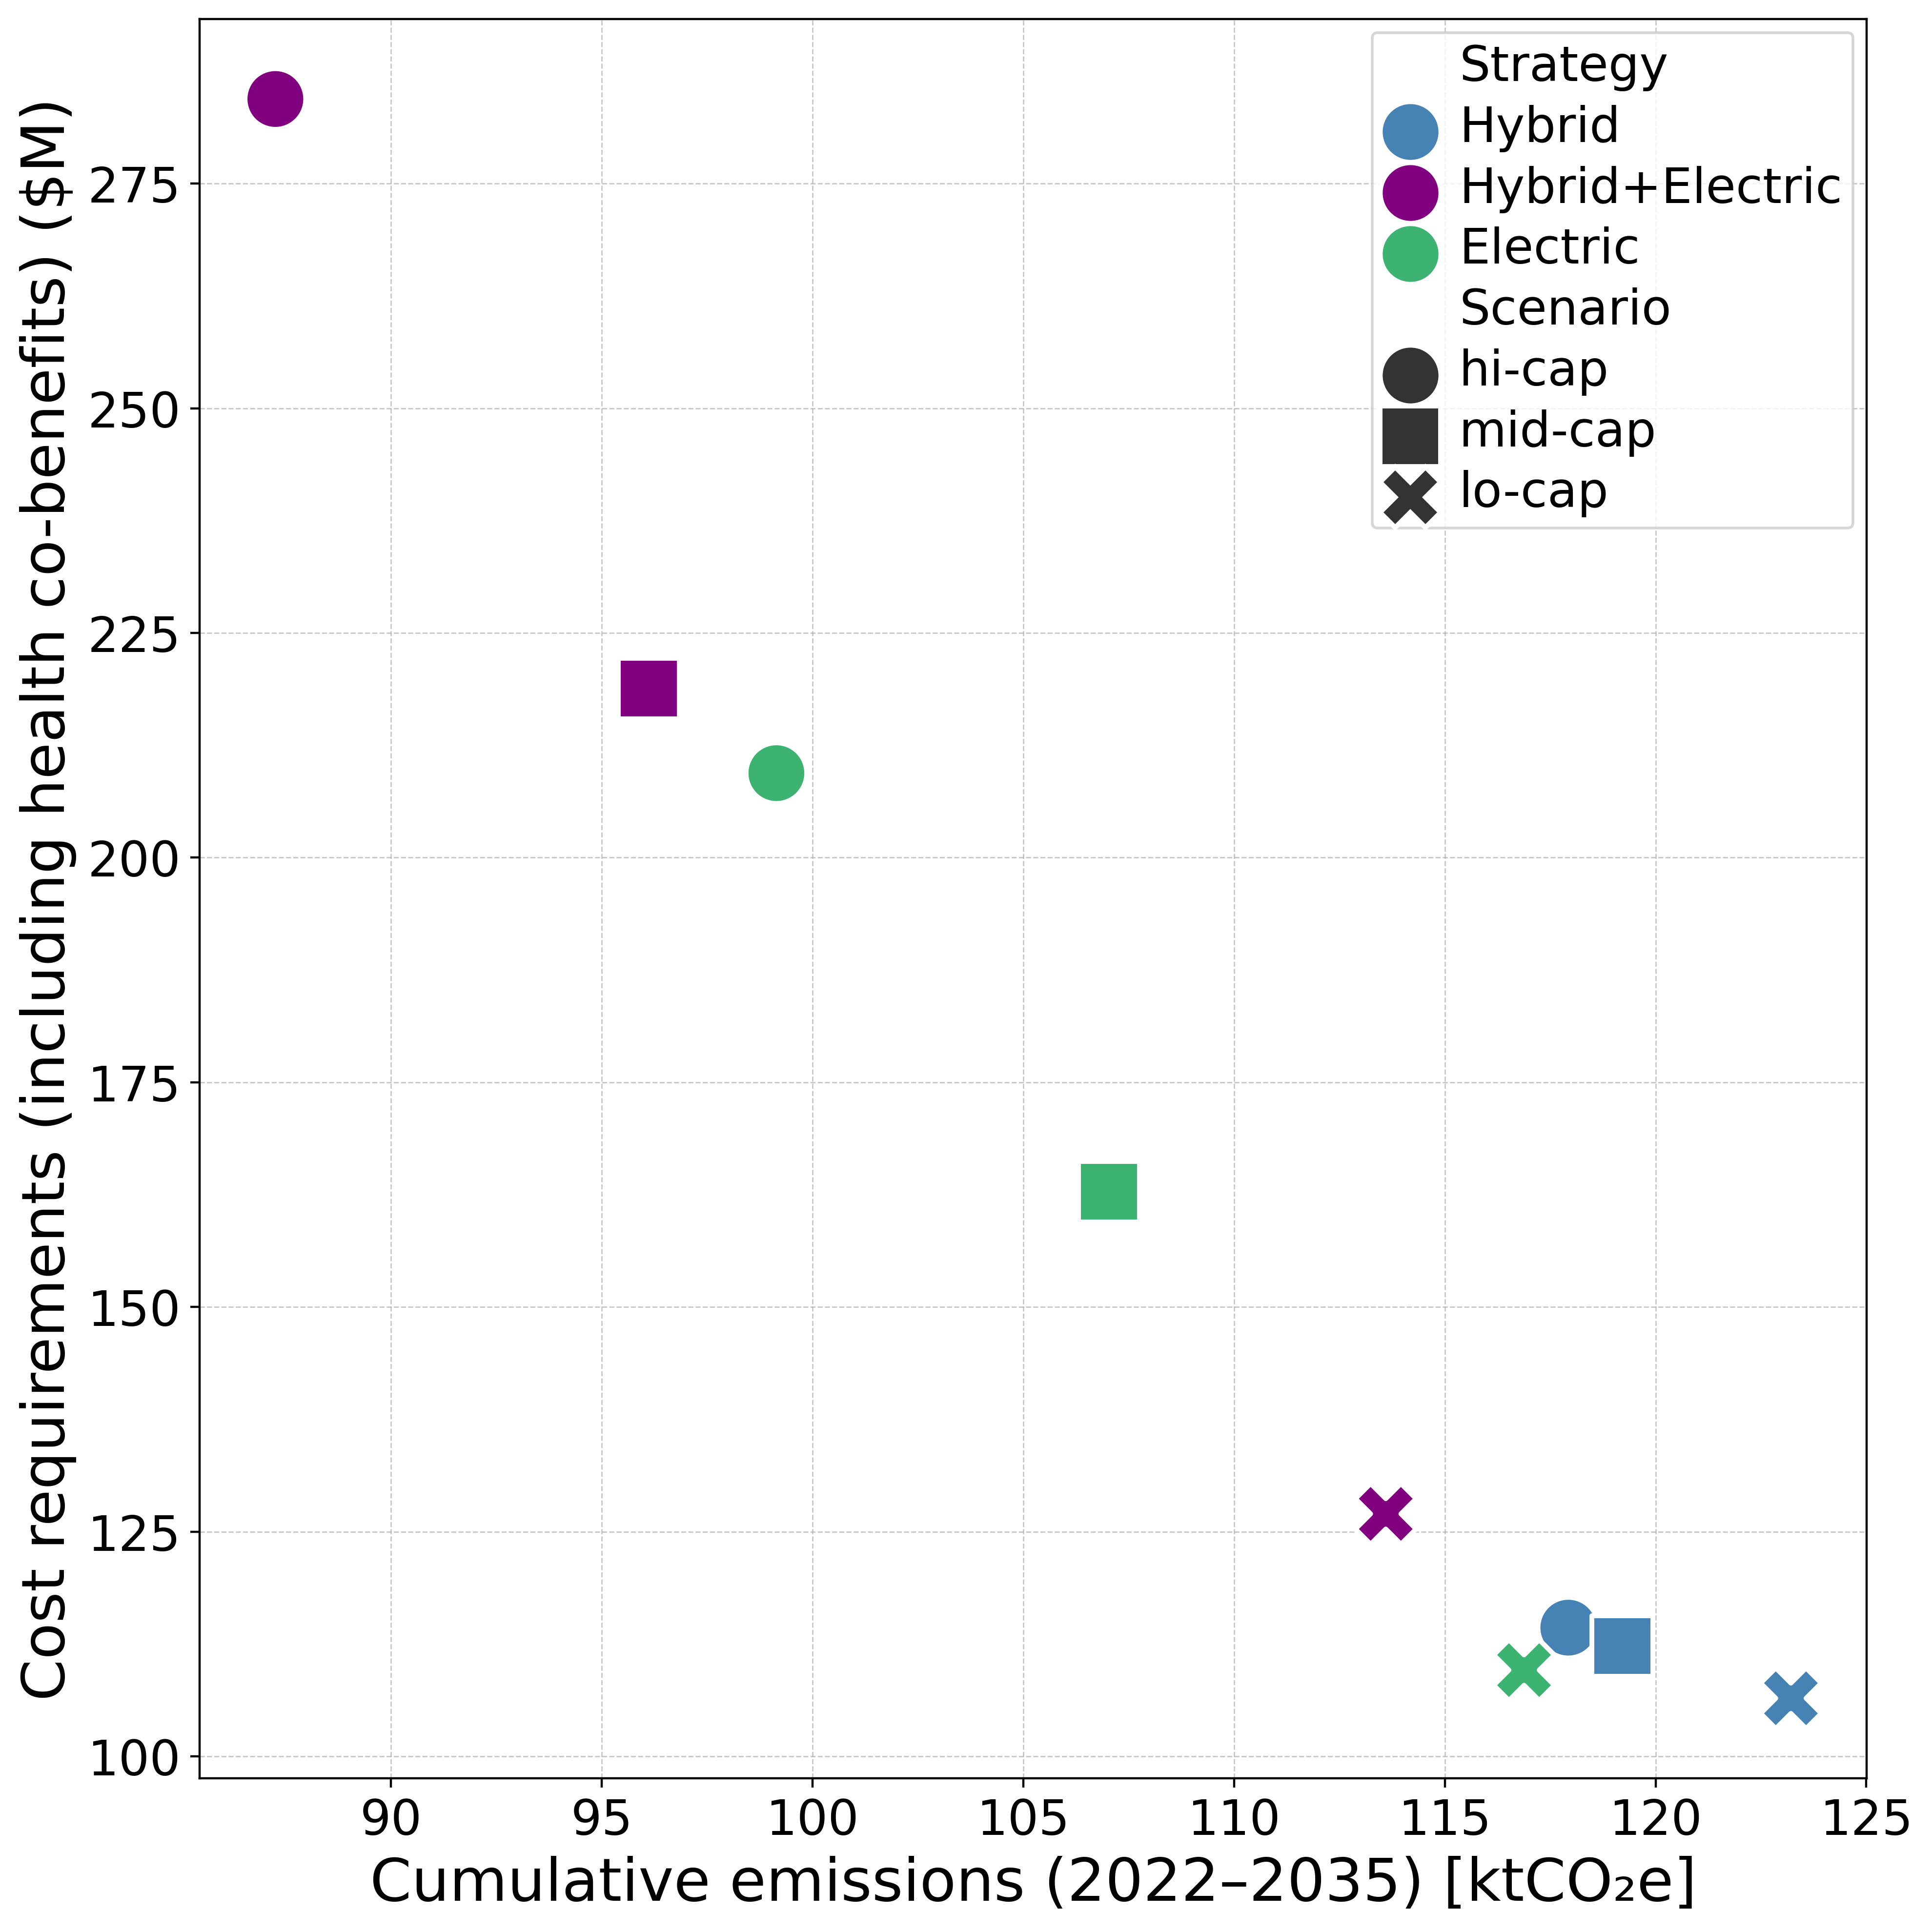

In [129]:
df = df_cost_emission_aggregated.copy()

# Unit conversion
df['CO2e_kt'] = df['CO2e'] / 1000
df['Total_Expenditure_M'] = df['Total_Expenditure']

# Filter out 'Status quo'
df_plot = df[df['future'] != 'Status quo'].copy()

# Color and marker definitions
colors = {
    'Hybrid': 'steelblue',
    'Hybrid+Electric': 'purple',
    'Electric': 'mediumseagreen'
}
markers = {
    'hi-cap': 'o',
    'lo-cap': 'X',
    'mid-cap': 's'
}

# Start plot
plt.figure(figsize=(10, 10), dpi=400)
plot = sns.scatterplot(
    data=df_plot,
    x='CO2e_kt',
    y='cost-benefit',
    hue='Strategy',
    hue_order=list(colors.keys()),
    palette=colors,
    style='Scenario',
    style_order=['hi-cap','mid-cap','lo-cap'],  # Scenario legend order
    markers=markers,
    zorder= 3,
    s=500
)

# Axis labels
plt.xlabel('Cumulative emissions (2022–2035) [ktCO₂e]', fontsize=22)
plt.ylabel('Cost requirements (including health co-benefits) ($M)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Customize legend
legend = plot.legend_
legend.get_title().set_fontsize('20')
for text in legend.get_texts():
    text.set_fontsize(18)

    
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


#plt.xlim(0, 100)
#plt.ylim(0, 550)


plt.tight_layout()
plt.savefig(r'../../figures/scatterplot_emissions_vs_investment_with_co_benefits_2035.png', bbox_inches='tight', dpi=400)
plt.show()
